##Test

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Project Start

In [ ]:
import tensorflow as tf

directory="/content/drive/MyDrive/signdata/data"
IMG_SIZE=128
Batch_Size=32


datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

train_generator=datagen.flow_from_directory(
    directory,
    target_size=(IMG_SIZE,IMG_SIZE),batch_size=Batch_Size,
    subset="training"
)

val_generator=datagen.flow_from_directory(
    directory,
    target_size=(IMG_SIZE,IMG_SIZE),batch_size=Batch_Size,
    subset="validation"
)

Found 5618 images belonging to 26 classes.
Found 1391 images belonging to 26 classes.


In [ ]:
labels='\n'.join(sorted(train_generator.class_indices.keys()))
with open('labels.txt','w') as f:
  f.write(labels)

In [ ]:
IMG_SHAPE=(IMG_SIZE,IMG_SIZE,3)
base_model=tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,include_top=False,weights="imagenet")

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable=False
model=tf.keras.Sequential([
            base_model,
            tf.keras.layers.Conv2D(32,3,activation="relu"),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.GlobalAveragePooling2D(),
            tf.keras.layers.Dense(train_generator.num_classes,activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Functi (None, 4, 4, 1280)        2257984   
_________________________________________________________________
conv2d (Conv2D)              (None, 2, 2, 32)          368672    
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 26)                858       
Total params: 2,627,514
Trainable params: 369,530
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,
                  validation_data=val_generator,
                  epochs=10)

Epoch 1/10
176/176 [==============================] - 2445s 14s/step - loss: 0.7527 - accuracy: 0.8137 - val_loss: 3.2946e-04 - val_accuracy: 1.0000
Epoch 2/10
176/176 [==============================] - 12s 71ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 1.5056e-04 - val_accuracy: 1.0000
Epoch 3/10
176/176 [==============================] - 12s 70ms/step - loss: 0.0084 - accuracy: 0.9972 - val_loss: 1.3789e-04 - val_accuracy: 1.0000
Epoch 4/10
176/176 [==============================] - 12s 70ms/step - loss: 0.0017 - accuracy: 0.9999 - val_loss: 6.2428e-05 - val_accuracy: 1.0000
Epoch 5/10
176/176 [==============================] - 12s 69ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 2.2219e-05 - val_accuracy: 1.0000
Epoch 6/10
176/176 [==============================] - 12s 69ms/step - loss: 7.3098e-04 - accuracy: 1.0000 - val_loss: 4.8556e-06 - val_accuracy: 1.0000
Epoch 7/10
176/176 [==============================] - 12s 69ms/step - loss: 1.7348e-04 - accuracy: 1.0000 -

In [ ]:
saved_model_dir=""
tf.saved_model.save(model,saved_model_dir)
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) # path to the SavedModel directory
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: assets


In [ ]:
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
from google.colab import files
files.download('model.tflite')
files.download('labels.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)
pred_dir="/content/drive/MyDrive/signdata/new/"
test_generator = test_datagen.flow_from_directory(
    directory=pred_dir,
    target_size=(128, 128),
    color_mode="rgb",
    batch_size=32,
    class_mode=None,
    shuffle=False
)



Found 0 images belonging to 0 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


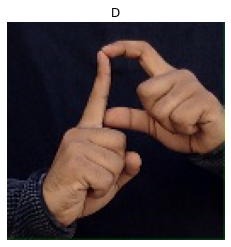

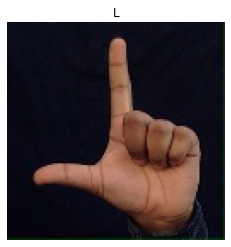

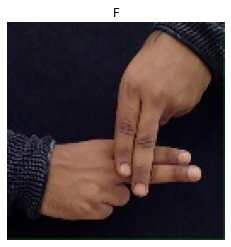

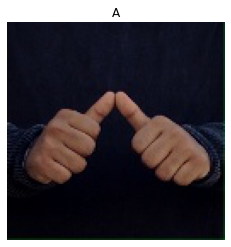

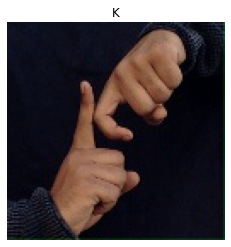

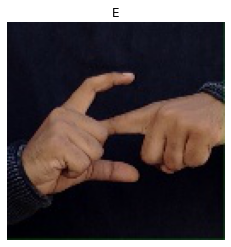

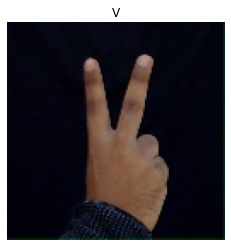

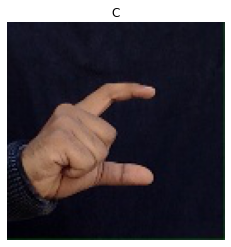

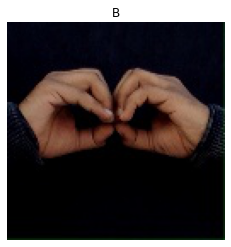

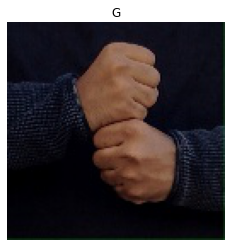

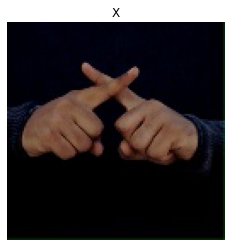

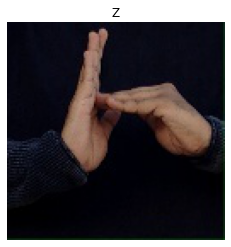

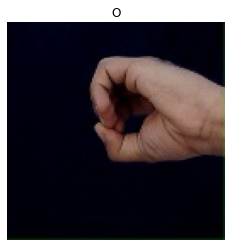

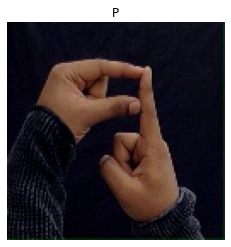

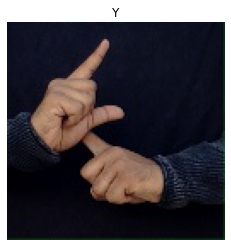

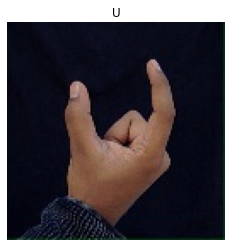

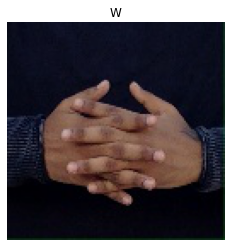

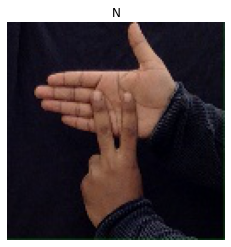

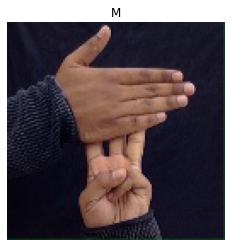

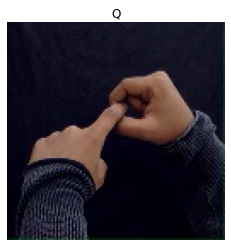

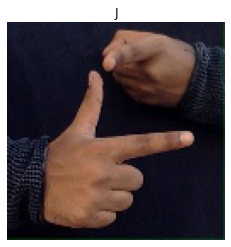

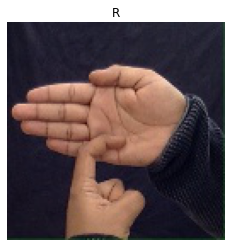

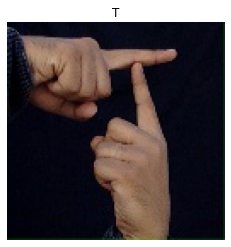

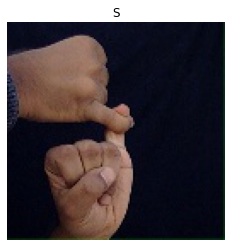

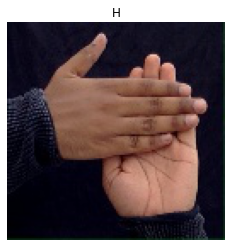

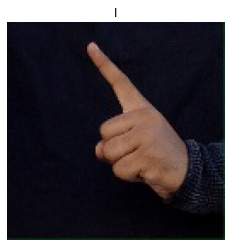

In [ ]:
vals = list(train_generator.class_indices.values())
keys = list(train_generator.class_indices.keys())
for i in os.listdir(pred_dir):
  img = load_img(pred_dir+i, target_size=(128, 128))
  img_tensor = img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255.
  pred=model.predict_classes(img_tensor)
  plt.imshow(img)
  plt.title(keys[vals.index(pred)])
  plt.axis("off")
  plt.show()
  

